<a href="https://colab.research.google.com/github/ChristianIES/Redes_Neuronales/blob/main/RN_2022_DL_Tarea_1_El_Perceptr%C3%B3n_Multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1 - El Perceptrón Multicapa como modelo de regresión

- Nombre: Valentina Bastidas S.
- Programa: Doctorado en Estadística


- Nombre: Christian Araya M.
- Programa: Doctorado en Estadística


- Nombre: 
- Programa: 


En la presente tarea se estudiará las capacidades y dificultades del Perceptrón Multicapa (MLP) como modelo de aprendizaje estadístico.

**Ingresar los Toolbox utilizados en este Notebook**



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from scipy.stats import spearmanr

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

In [5]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

En esta tarea Ud. deberá construir un modelo de MLP para aproximar una superficie en el espacio $\mathbb{R}^3$

La superficie que se va a aproximar con la red neuronal será la siguiente:

$$z =  3\cdot (1-x)^2\cdot e^{-x^2 - (y+1)^2} - 10\cdot (\frac{1}{5}x - x^3 - y^5)\cdot e^{-x^2-y^2} - \frac{1}{3}\cdot e^{-(x+1)^2 - y^2} $$


1. Generar una función que dado el valor de $x$ e $y$ calcule $z$

In [13]:
def zeta(x,y):
  z =  3* (1-x)**2 * np.exp(-x**2-(y+1)**2)- 10* (1/5*x-x**3-y**5)*np.exp(-x**2-y**2)-1/3*np.exp(-(x+1)**2-y**2)
  return(z)




2. Realizar el gráfico de la superficie en el rango $[-3,3]\times [-3,3]$. (https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)

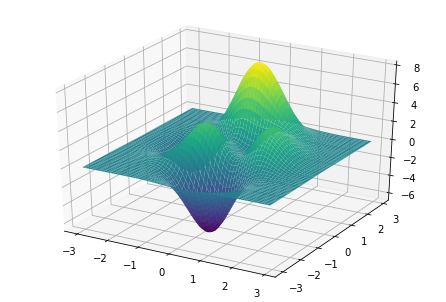

In [14]:
XX = np.arange(-3, 3, 0.1)
XY = np.arange(-3, 3, 0.1)
XX, XY = np.meshgrid(XX, XY)
Z = zeta(XX,XY)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, XY, Z, rstride=1, cstride=1, cmap=cm.viridis)

3. Generar de forma aleatoria 10000 datos $(x,y,z)$ con distribución uniforme en el rango $[-3,3]\times [-3,3]$. Realizar un gráfico de dispersión de los puntos. Considerar este cojunto como conjunto de entrenamiento. Luego, generar de forma aleatoria otros 10000 datos para el conjunto de test.

In [19]:
#Generación de Datos Aleatorios (Datos de Entrenamiento):

x1 = np.random.uniform(-3,3,10000)
y1 = np.random.uniform(-3,3,10000)
z1=zeta(x1,y1)

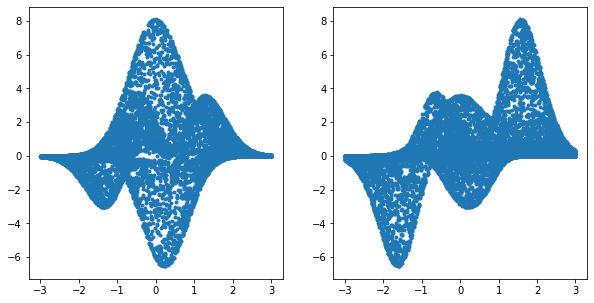

In [16]:
#Gráficos de Dispersión:
fig, dis = plt.subplots(1,2,figsize=(10,5))
dis[0].plot(x, z,'.')
dis[1].plot(y, z,'.')

In [18]:
#Conjunto Test:
x2 = np.random.uniform(-3,3,10000)
y2 = np.random.uniform(-3,3,10000)
z2=zeta(x2,y2)

4. Generar una nueva variable $V$ a la cual se le introduce un ruido gaussiano con desviación estándar de $0.05$, es decir:

$$v = z + \epsilon$$

donde $\epsilon \sim {\cal N}(0, \sigma_{\epsilon}^2)$, $\sigma_{\epsilon}=0.7$

Realizar el grafico de dispersión.

In [26]:
e = np.random.normal(0,0.05, len(z1))
#Conjunto respuesta Entrenamiento:
v1=z1+e
#Conjunto respuesta Prueba:
e = np.random.normal(0,0.05, len(z1))
v2=z2+e

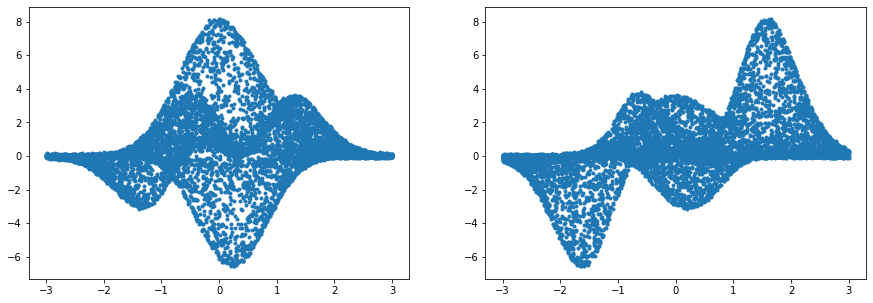

In [27]:
#Gráficos para el conjunto Entrenamiento con error gaussiano:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x1, v1,'.')
ax[1].plot(y1, v1,'.')

<font color='#086F0C'>Como se puede apreciar, la distorsión que incorpora el ruido gaussiano no modifica drásticamente la relación que existe entre las variables y "z", el valor de la función, debido principalmente a la desviación estándar pequeña para la componente de ruido.</font>

---



5. **Estudio sobre el Sobreajuste y la Capacidad de Aprendizaje:** Diseñar e Implentar una red neuronal MLP con el fin de que pueda aprender la variable $V$, teniendo como entrada las variables $X$ e $Y$. 

Calcular la raíz del error cuadrático medio del modelo con respecto a $V$, tanto para el conjunto de entrenamiento como el de test. Ajustar el modelo hasta obtener un error con el conjunto de entrenamiento muy cercano a cero.

In [32]:
#reescalar los datos del conjunto Entrenamiento:
XY1 = np.vstack((x1,y1)).T
scaler = MinMaxScaler(feature_range=(0, 1))
XY1 = scaler.fit_transform(XY1)
print(len(XY1))

10000


In [33]:
#reescalar los datos del conjunto Prueba:
XY2 = np.vstack((x2,y2)).T
scaler = MinMaxScaler(feature_range=(0, 1))
XY2 = scaler.fit_transform(XY2)
print(len(XY2))

10000


In [35]:
#Modelo de Perceptrón Multicapa (MLP):

model = Sequential()
model.add(Dense(100, input_dim=2, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', 
              optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 20)                2020      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,341
Trainable params: 2,341
Non-trainable params: 0
_________________________________________________________________


In [36]:
#Ajuste:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1000)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
model.fit(XY1, v1, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es,mc])

313/313 [==============================] - 0s 818us/step
MSE: 0.007260715903050671
MAE: 0.06687652544101579
RMSE: 0.08520983454420429
Spearman R: SpearmanrResult(correlation=0.969829361819022, pvalue=0.0)
R2: 0.997992178155629


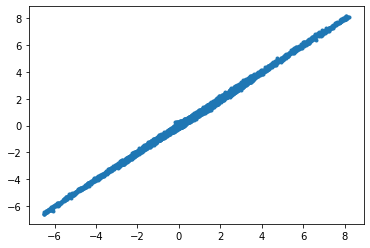

In [38]:
#Mejor modelo y diagnóstico:
modelo = load_model('best_model.h5')
v1_predict = modelo.predict(XY1)
plt.plot(v1_predict,v1,'.')
print('MSE:', mean_squared_error(v1, v1_predict))
print('MAE:', mean_absolute_error(v1, v1_predict))
print('RMSE:', mean_squared_error(v1, v1_predict)**0.5)
print('Spearman R:', spearmanr(v1, v1_predict))
print('R2:', r2_score(v1, v1_predict))

2/2 [==============================] - 0s 4ms/step


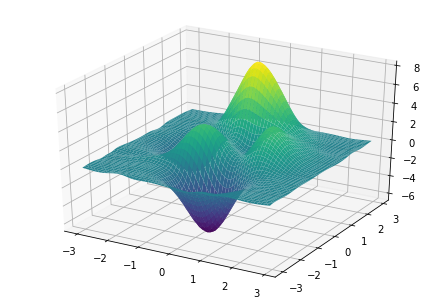

In [39]:
#Gráfico de la predicción:
X = np.arange(-3, 3, .1)
Y = np.arange(-3, 3, .1)
X,Y = np.meshgrid(X, Y)
Z=np.zeros_like(X).astype(float)
k=0
for (z1,z2) in zip(X,Y):
    x = scaler.transform(np.vstack((z1,z2)).T)
    Z[k,:] =  modelo.predict(x).T
    k=k+1
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

6. Respecto a la pregunta anterior, concluir sobre los resultados obtenidos discutiendo sobre el sobreajuste y la capacidad de aprendizaje.

<font color='#086F0C'>Al permitir que el modelo itere por 1000 épocas, sin parada temprana, se alcanzan, sobre el mismo conjunto de datos de entrenamiento, métricas de error cercanas a 0 (en particular, la raíz del error cuadrático medio, $RMSE$, es cercana a 0.09). Con ello, los indicadores de correlación de Spearman y $R^2$, para estudiar la relación entre el valor real de la función ($z$) y la predicción, exhiben valores cercanos a 1. Esto señala que el modelo sin restricciones que apunten a detener su ejecución, puede llegar a sobreaprender el conjunto de datos sobre el cual se está entrenando (por ejemplo, el gráfico sobre la grilla equiespaciada es altamente similar a la función a la original), poniendo en riesgo su capacidad de predecir sobre un conjunto de datos foráneo, por ejemplo al evaluar sobre un set de datos de prueba.

Por último, es importante señalar que en este experimento se utilizó una red con dos capas ocultas, de 100 y 20 neuronas respectivamente, luego de la capa de entrada.</font>

---

313/313 [==============================] - 0s 801us/step
MSE: 0.007399590705315587
MAE: 0.06800235775810484
RMSE: 0.08602087366049933
Spearman R: SpearmanrResult(correlation=0.9733238853007586, pvalue=0.0)
R2: 0.9980192088644314


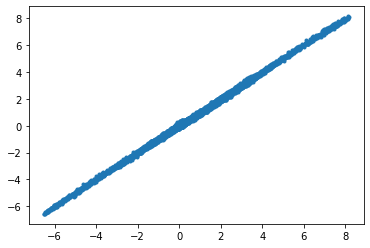

In [40]:
modelo = load_model('best_model.h5')
v2_predict = modelo.predict(XY2)
plt.plot(v2_predict,v2,'.')
print('MSE:', mean_squared_error(v2, v2_predict))
print('MAE:', mean_absolute_error(v2, v2_predict))
print('RMSE:', mean_squared_error(v2, v2_predict)**0.5)
print('Spearman R:', spearmanr(v2, v2_predict))
print('R2:', r2_score(v2, v2_predict))

<font color='#086F0C'>Cuando se realiza el mismo ejercicio sobre el conjunto de datos de prueba, se verifica nuevamente un desempeño similar ($RMSE \sim 0.09)$, con elevados correlación de Spearman y coeficiente $R^2$. En este sentido, si bien se concluye que la predicción tiene alto nivel de precisión, se ha forzado a que el modelo sobreaprenda el comportamiento de la función a modelar.</font>

---

7. Respecto a la pregunta 5, concluir sobre el **teorema de aproximación universal**.

<font color='#086F0C'>De acuerdo con Goodfellow et al. (2016), el Teorema de Aproximación Universal establece que una red feedforward con una capa lineal de salida y al menos una capa oculta, como la arquitectura de este ejercicio, puede representar funciones Borel medibles (como la función de este experimento, que es continua y acotada en el conjunto $[-3,3]x[-3,3]$) con cualquier nivel de error dado (con una cantidad de neuronas en las capas ocultas apropiada).

En este caso, el alto nivel de ajuste logrado sustenta de manera empírica el Teorema, en particular notando que la función es no lineal. </font>

---

7. **Parada Temprana y búsqueda de un modelo adecuado:** Diseñar e Implentar una red neuronal MLP con el fin de que pueda aprender la variable $V$, teniendo como entrada las variables $X$ e $Y$. El modelo deberá tener una arquitectura parsimoniosa.

Calcular la raíz del error cuadrático medio del modelo con respecto a $V$, tanto para el conjunto de entrenamiento como el de test. Ajustar el modelo incorporando un conjunto de validación con el fin de hacer una parada temprana en caso que el error empiece a aumentar. 

In [41]:
#Ajuste del modelo con parada temprana (paciencia = 10):
es2 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc2 = ModelCheckpoint('best_model2.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
model.fit(XY1, v1, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True,callbacks=[es2,mc2])

313/313 [==============================] - 0s 868us/step
MSE: 0.0070327942110957305
MAE: 0.06567997892168269
RMSE: 0.08386175654668658
Spearman R: SpearmanrResult(correlation=0.9703672639513169, pvalue=0.0)
R2: 0.9980552058457389


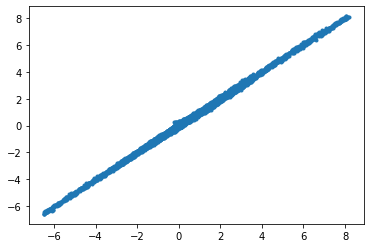

In [43]:
#Mejor modelo y diagnóstico:
modelo2 = load_model('best_model2.h5')
v1_predict_m2 = modelo2.predict(XY1)
plt.plot(v1_predict_m2,v1,'.')
print('MSE:', mean_squared_error(v1, v1_predict_m2))
print('MAE:', mean_absolute_error(v1, v1_predict_m2))
print('RMSE:', mean_squared_error(v1, v1_predict_m2)**0.5)
print('Spearman R:', spearmanr(v1, v1_predict_m2))
print('R2:', r2_score(v1, v1_predict_m2))

313/313 [==============================] - 0s 841us/step
MSE: 0.007217764861473782
MAE: 0.06691436191236835
RMSE: 0.08495742970143212
Spearman R: SpearmanrResult(correlation=0.9739454358160635, pvalue=0.0)
R2: 0.9980678816943274


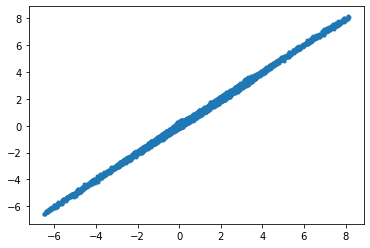

In [44]:
v2_predict_m2 = modelo2.predict(XY2)
plt.plot(v2_predict_m2,v2,'.')
print('MSE:', mean_squared_error(v2, v2_predict_m2))
print('MAE:', mean_absolute_error(v2, v2_predict_m2))
print('RMSE:', mean_squared_error(v2, v2_predict_m2)**0.5)
print('Spearman R:', spearmanr(v2, v2_predict_m2))
print('R2:', r2_score(v2, v2_predict_m2))

8. Respecto a la pregunta anterior, concluir sobre los resultados obtenidos discutiendo sobre la capacidad de generalización.

<font color='#086F0C'>Al implementar un mecanismo de parada temprana (paciencia = 10) sobre la misma arquitectura de red, en este caso, se ha obtenido una solución muy similar a la anterior, en término de sus medidas de error, pero en un tiempo de ejecución considerablemente inferior. En este sentido, la utilización de una restricción para las ejecuciones, en pos de una solución más práctica, muestra que el resultado logrado puede ser igualmente satisfactorio.

No obstante, Goodfellow et al. (2016) levanta la alerta de que no existe un procedimiento universal que asegure que los resultados serán generalizables a un conjunto de datos distintos al de entrenamiento. En este experimento, el buen desempeño en general puede deberse a la cantidad de neuronas empleadas en las capas ocultas (2 capas ocultas), lo que repercute en el elevado número de parámetros que considera el modelo implementado (cerca de 2300 parámetros en total). </font>

---

9 **Deep vs Wide en MLP**

- Shallow MLP: Diseñar e implementar un MLP con una única capa escondida, variando el número de neuronas en 5, 10, 50, 100, 1000.

- Deep MLP: Diseñar e implementar un MLP con una única capa escondida, variando el número de capas en 2, 3, 5 y 10, cada capa con 5 neuronas escondidas.

Evaluar los desempeños con el conjunto de Test y Concluir


In [45]:
#1 capa escondida, 5 neuronas:

model2 = Sequential()
#model.add(Dense(100, input_dim=2, activation='sigmoid'))
model2.add(Dense(5, input_dim=2, activation='sigmoid'))
model2.add(Dense(1, activation='linear'))

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 15        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [46]:
#Ajuste:
es3 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc3 = ModelCheckpoint('best_model3.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


In [ ]:
model2.fit(XY1, v1, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es3,mc3])

313/313 [==============================] - 0s 826us/step
MSE: 1.4688697464364882
MAE: 0.8493116038070954
RMSE: 1.2119693669546636
Spearman R: SpearmanrResult(correlation=0.7836868380955705, pvalue=0.0)
R2: 0.6067993097299058


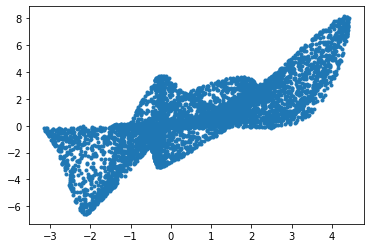

In [48]:
modelo = load_model('best_model3.h5')

v2_test3 = modelo.predict(XY2)  #predicción con XY2, conjunto de datos de Prueba

plt.plot(v2_test3,v2,'.')   #v2 contiene los valores calculados de la función

print('MSE:', mean_squared_error(v2, v2_test3))
print('MAE:', mean_absolute_error(v2, v2_test3))
print('RMSE:', mean_squared_error(v2, v2_test3)**0.5)
print('Spearman R:', spearmanr(v2, v2_test3))
print('R2:', r2_score(v2, v2_test3))

In [49]:
#1 capa escondida, 10 neuronas:

model4 = Sequential()
#model.add(Dense(100, input_dim=2, activation='sigmoid'))
model4.add(Dense(10, input_dim=2, activation='sigmoid'))
model4.add(Dense(1, activation='linear'))

model4.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model4.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                30        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [50]:
#Ajuste:
es4 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc4 = ModelCheckpoint('best_model4.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
model4.fit(XY1, v1, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es4,mc4])

313/313 [==============================] - 0s 867us/step
MSE: 1.0281008122874222
MAE: 0.7327047337730684
RMSE: 1.013953062171727
Spearman R: SpearmanrResult(correlation=0.8316861322413563, pvalue=0.0)
R2: 0.7247884299888546


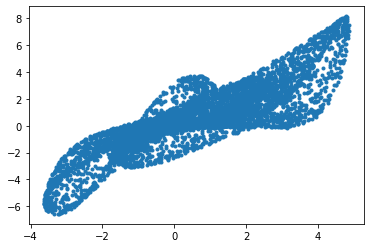

In [52]:
modelo = load_model('best_model4.h5')

v2_test4 = modelo.predict(XY2)

plt.plot(v2_test4,v2,'.')

print('MSE:', mean_squared_error(v2, v2_test4))
print('MAE:', mean_absolute_error(v2, v2_test4))
print('RMSE:', mean_squared_error(v2, v2_test4)**0.5)
print('Spearman R:', spearmanr(v2, v2_test4))
print('R2:', r2_score(v2, v2_test4))

In [53]:
#1 capa escondida, 50 neuronas:

model5 = Sequential()
#model.add(Dense(100, input_dim=2, activation='sigmoid'))
model5.add(Dense(50, input_dim=2, activation='sigmoid'))
model5.add(Dense(1, activation='linear'))

model5.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model5.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                150       
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [54]:
#Ajuste:
es5 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc5 = ModelCheckpoint('best_model5.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
model5.fit(XY1, v1, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es5,mc5])

313/313 [==============================] - 0s 832us/step
MSE: 0.7345815756379647
MAE: 0.6211414184578228
RMSE: 0.8570773451900153
Spearman R: SpearmanrResult(correlation=0.8824833409061282, pvalue=0.0)
R2: 0.803360384199301


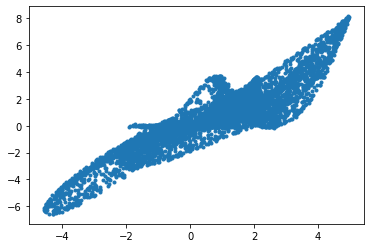

In [56]:
modelo = load_model('best_model5.h5')

v2_test5 = modelo.predict(XY2)

plt.plot(v2_test5,v2,'.')

print('MSE:', mean_squared_error(v2, v2_test5))
print('MAE:', mean_absolute_error(v2, v2_test5))
print('RMSE:', mean_squared_error(v2, v2_test5)**0.5)
print('Spearman R:', spearmanr(v2, v2_test5))
print('R2:', r2_score(v2, v2_test5))

In [57]:
#1 capa escondida, 100 neuronas:

model6 = Sequential()
#model.add(Dense(100, input_dim=2, activation='sigmoid'))
model6.add(Dense(100, input_dim=2, activation='sigmoid'))
model6.add(Dense(1, activation='linear'))

model6.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model6.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               300       
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [58]:
#Ajuste:
es6 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc6 = ModelCheckpoint('best_model6.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [59]:
model6.fit(XY1, v1, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es6,mc6])

Epoch 1/1000
316/350 [==========================>...] - ETA: 0s - loss: 3.5446 - mean_absolute_error: 1.2015 - mean_squared_error: 3.5446
Epoch 1: val_loss improved from inf to 3.32212, saving model to best_model6.h5
350/350 [==============================] - 1s 2ms/step - loss: 3.5642 - mean_absolute_error: 1.2050 - mean_squared_error: 3.5642 - val_loss: 3.3221 - val_mean_absolute_error: 1.1201 - val_mean_squared_error: 3.3221
Epoch 2/1000
339/350 [============================>.] - ETA: 0s - loss: 3.3616 - mean_absolute_error: 1.1634 - mean_squared_error: 3.3616
Epoch 2: val_loss improved from 3.32212 to 3.17760, saving model to best_model6.h5
350/350 [==============================] - 1s 2ms/step - loss: 3.3409 - mean_absolute_error: 1.1608 - mean_squared_error: 3.3409 - val_loss: 3.1776 - val_mean_absolute_error: 1.1498 - val_mean_squared_error: 3.1776
Epoch 3/1000
346/350 [============================>.] - ETA: 0s - loss: 3.2078 - mean_absolute_error: 1.1724 - mean_squared_error: 3

313/313 [==============================] - 0s 805us/step
MSE: 1.3206518913705014
MAE: 0.8199153228213066
RMSE: 1.14919619359381
Spearman R: SpearmanrResult(correlation=0.7981876779222714, pvalue=0.0)
R2: 0.6464756411838593


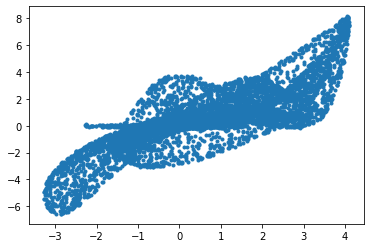

In [60]:
modelo = load_model('best_model6.h5')

v2_test6 = modelo.predict(XY2)

plt.plot(v2_test6,v2,'.')

print('MSE:', mean_squared_error(v2, v2_test6))
print('MAE:', mean_absolute_error(v2, v2_test6))
print('RMSE:', mean_squared_error(v2, v2_test6)**0.5)
print('Spearman R:', spearmanr(v2, v2_test6))
print('R2:', r2_score(v2, v2_test6))

In [61]:
#1 capa escondida, 1000 neuronas:

model7 = Sequential()
#model.add(Dense(100, input_dim=2, activation='sigmoid'))
model7.add(Dense(1000, input_dim=2, activation='sigmoid'))
model7.add(Dense(1, activation='linear'))

model7.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model7.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1000)              3000      
                                                                 
 dense_15 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________


In [62]:
#Ajuste:
es7 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc7 = ModelCheckpoint('best_model7.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
model7.fit(XY1, v1, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es7,mc7])

313/313 [==============================] - 0s 881us/step
MSE: 3.180057100138114
MAE: 1.2552692387978681
RMSE: 1.7832714600245567
Spearman R: SpearmanrResult(correlation=0.49599764993346446, pvalue=0.0)
R2: 0.14873279274345375


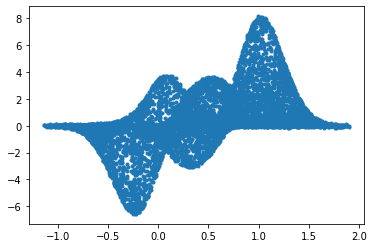

In [64]:
modelo = load_model('best_model7.h5')

v2_test7 = modelo.predict(XY2)

plt.plot(v2_test7,v2,'.')

print('MSE:', mean_squared_error(v2, v2_test7))
print('MAE:', mean_absolute_error(v2, v2_test7))
print('RMSE:', mean_squared_error(v2, v2_test7)**0.5)
print('Spearman R:', spearmanr(v2, v2_test7))
print('R2:', r2_score(v2, v2_test7))

In [65]:
#2 capas escondidas, 5 neuronas:

model8 = Sequential()
#model.add(Dense(100, input_dim=2, activation='sigmoid'))
model8.add(Dense(5, input_dim=2, activation='sigmoid'))
model8.add(Dense(5, activation='sigmoid'))
model8.add(Dense(1, activation='linear'))

model8.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model8.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 5)                 15        
                                                                 
 dense_17 (Dense)            (None, 5)                 30        
                                                                 
 dense_18 (Dense)            (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [66]:
#Ajuste:
es8 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc8 = ModelCheckpoint('best_model8.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
model8.fit(XY1, v1, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es8,mc8])

313/313 [==============================] - 0s 860us/step
MSE: 0.49034159114114656
MAE: 0.4981961051738367
RMSE: 0.7002439511635545
Spearman R: SpearmanrResult(correlation=0.8585889844096476, pvalue=0.0)
R2: 0.8687408106998059


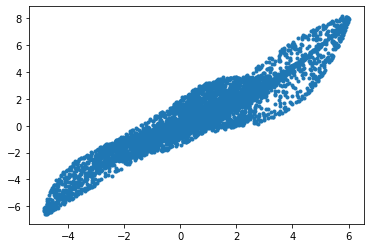

In [68]:
modelo = load_model('best_model8.h5')

v2_test8 = modelo.predict(XY2)

plt.plot(v2_test8,v2,'.')

print('MSE:', mean_squared_error(v2, v2_test8))
print('MAE:', mean_absolute_error(v2, v2_test8))
print('RMSE:', mean_squared_error(v2, v2_test8)**0.5)
print('Spearman R:', spearmanr(v2, v2_test8))
print('R2:', r2_score(v2, v2_test8))

In [69]:
#3 capas escondidas, 5 neuronas:

model9 = Sequential()
#model.add(Dense(100, input_dim=2, activation='sigmoid'))
model9.add(Dense(5, input_dim=2, activation='sigmoid'))
model9.add(Dense(5, activation='sigmoid'))
model9.add(Dense(5, activation='sigmoid'))
model9.add(Dense(1, activation='linear'))

model9.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 5)                 15        
                                                                 
 dense_20 (Dense)            (None, 5)                 30        
                                                                 
 dense_21 (Dense)            (None, 5)                 30        
                                                                 
 dense_22 (Dense)            (None, 1)                 6         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [70]:
#Ajuste:
es9 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc9 = ModelCheckpoint('best_model9.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [71]:
model9.fit(XY1, v1, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es9,mc9])

Epoch 1/1000
315/350 [==========================>...] - ETA: 0s - loss: 3.8205 - mean_absolute_error: 1.2120 - mean_squared_error: 3.8205
Epoch 1: val_loss improved from inf to 3.52190, saving model to best_model9.h5
350/350 [==============================] - 1s 2ms/step - loss: 3.8350 - mean_absolute_error: 1.2157 - mean_squared_error: 3.8350 - val_loss: 3.5219 - val_mean_absolute_error: 1.1646 - val_mean_squared_error: 3.5219
Epoch 2/1000
319/350 [==========================>...] - ETA: 0s - loss: 3.6251 - mean_absolute_error: 1.2061 - mean_squared_error: 3.6251
Epoch 2: val_loss improved from 3.52190 to 3.52020, saving model to best_model9.h5
350/350 [==============================] - 1s 2ms/step - loss: 3.6446 - mean_absolute_error: 1.2119 - mean_squared_error: 3.6446 - val_loss: 3.5202 - val_mean_absolute_error: 1.1932 - val_mean_squared_error: 3.5202
Epoch 3/1000
322/350 [==========================>...] - ETA: 0s - loss: 3.6326 - mean_absolute_error: 1.2201 - mean_squared_error: 3

313/313 [==============================] - 0s 902us/step
MSE: 0.09079790163860585
MAE: 0.20172071569234673
RMSE: 0.3013269016178374
Spearman R: SpearmanrResult(correlation=0.9484000214430713, pvalue=0.0)
R2: 0.9756943747490278


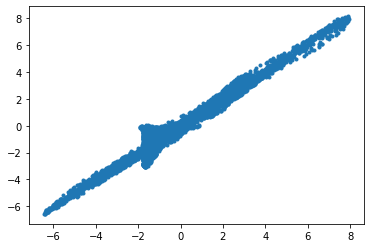

In [72]:
modelo = load_model('best_model9.h5')

v2_test9 = modelo.predict(XY2)

plt.plot(v2_test9,v2,'.')

print('MSE:', mean_squared_error(v2, v2_test9))
print('MAE:', mean_absolute_error(v2, v2_test9))
print('RMSE:', mean_squared_error(v2, v2_test9)**0.5)
print('Spearman R:', spearmanr(v2, v2_test9))
print('R2:', r2_score(v2, v2_test9))

In [73]:
#5 capas escondidas, 5 neuronas:

model10 = Sequential()
#model.add(Dense(100, input_dim=2, activation='sigmoid'))
model10.add(Dense(5, input_dim=2, activation='sigmoid'))
model10.add(Dense(5, activation='sigmoid'))
model10.add(Dense(5, activation='sigmoid'))
model10.add(Dense(5, activation='sigmoid'))
model10.add(Dense(5, activation='sigmoid'))
model10.add(Dense(1, activation='linear'))

model10.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model10.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 5)                 15        
                                                                 
 dense_24 (Dense)            (None, 5)                 30        
                                                                 
 dense_25 (Dense)            (None, 5)                 30        
                                                                 
 dense_26 (Dense)            (None, 5)                 30        
                                                                 
 dense_27 (Dense)            (None, 5)                 30        
                                                                 
 dense_28 (Dense)            (None, 1)                 6         
                                                                 
Total params: 141
Trainable params: 141
Non-trainable 

In [74]:
#Ajuste:
es10 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc10 = ModelCheckpoint('best_model10.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [75]:
model10.fit(XY1, v1, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es10,mc10])

Epoch 1/1000
314/350 [=========================>....] - ETA: 0s - loss: 3.8093 - mean_absolute_error: 1.2031 - mean_squared_error: 3.8093
Epoch 1: val_loss improved from inf to 3.52751, saving model to best_model10.h5
350/350 [==============================] - 1s 2ms/step - loss: 3.7667 - mean_absolute_error: 1.2006 - mean_squared_error: 3.7667 - val_loss: 3.5275 - val_mean_absolute_error: 1.1695 - val_mean_squared_error: 3.5275
Epoch 2/1000
313/350 [=========================>....] - ETA: 0s - loss: 3.6826 - mean_absolute_error: 1.2266 - mean_squared_error: 3.6826
Epoch 2: val_loss did not improve from 3.52751
350/350 [==============================] - 1s 2ms/step - loss: 3.6551 - mean_absolute_error: 1.2199 - mean_squared_error: 3.6551 - val_loss: 3.5285 - val_mean_absolute_error: 1.1807 - val_mean_squared_error: 3.5285
Epoch 3/1000
327/350 [===========================>..] - ETA: 0s - loss: 3.6705 - mean_absolute_error: 1.2269 - mean_squared_error: 3.6705
Epoch 3: val_loss improved fr

313/313 [==============================] - 0s 851us/step
MSE: 2.5109870924096125
MAE: 1.162903777423715
RMSE: 1.5846094447559034
Spearman R: SpearmanrResult(correlation=0.5872616027051335, pvalue=0.0)
R2: 0.32783566385649776


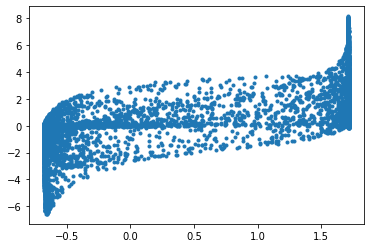

In [76]:
modelo = load_model('best_model10.h5')

v2_test10 = modelo.predict(XY2)

plt.plot(v2_test10,v2,'.')

print('MSE:', mean_squared_error(v2, v2_test10))
print('MAE:', mean_absolute_error(v2, v2_test10))
print('RMSE:', mean_squared_error(v2, v2_test10)**0.5)
print('Spearman R:', spearmanr(v2, v2_test10))
print('R2:', r2_score(v2, v2_test10))

In [77]:
#10 capas escondidas, 5 neuronas:

model11 = Sequential()
#model.add(Dense(100, input_dim=2, activation='sigmoid'))
model11.add(Dense(5, input_dim=2, activation='sigmoid'))
model11.add(Dense(5, activation='sigmoid'))
model11.add(Dense(5, activation='sigmoid'))
model11.add(Dense(5, activation='sigmoid'))
model11.add(Dense(5, activation='sigmoid'))
model11.add(Dense(5, activation='sigmoid'))
model11.add(Dense(5, activation='sigmoid'))
model11.add(Dense(5, activation='sigmoid'))
model11.add(Dense(5, activation='sigmoid'))
model11.add(Dense(5, activation='sigmoid'))
model11.add(Dense(1, activation='linear'))

model11.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 5)                 15        
                                                                 
 dense_30 (Dense)            (None, 5)                 30        
                                                                 
 dense_31 (Dense)            (None, 5)                 30        
                                                                 
 dense_32 (Dense)            (None, 5)                 30        
                                                                 
 dense_33 (Dense)            (None, 5)                 30        
                                                                 
 dense_34 (Dense)            (None, 5)                 30        
                                                                 
 dense_35 (Dense)            (None, 5)               

In [78]:
#Ajuste:
es11 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc11 = ModelCheckpoint('best_model11.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [81]:
model11.fit(XY1, v1, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es11,mc11])

Epoch 1/1000
329/350 [===========================>..] - ETA: 0s - loss: 3.6526 - mean_absolute_error: 1.2222 - mean_squared_error: 3.6526
Epoch 1: val_loss did not improve from 3.52764
350/350 [==============================] - 1s 2ms/step - loss: 3.6544 - mean_absolute_error: 1.2247 - mean_squared_error: 3.6544 - val_loss: 3.5280 - val_mean_absolute_error: 1.1763 - val_mean_squared_error: 3.5280
Epoch 2/1000
329/350 [===========================>..] - ETA: 0s - loss: 3.6333 - mean_absolute_error: 1.2192 - mean_squared_error: 3.6333
Epoch 2: val_loss did not improve from 3.52764
350/350 [==============================] - 1s 2ms/step - loss: 3.6545 - mean_absolute_error: 1.2254 - mean_squared_error: 3.6545 - val_loss: 3.5276 - val_mean_absolute_error: 1.1700 - val_mean_squared_error: 3.5276
Epoch 3/1000
349/350 [============================>.] - ETA: 0s - loss: 3.6628 - mean_absolute_error: 1.2214 - mean_squared_error: 3.6628
Epoch 3: val_loss did not improve from 3.52764
350/350 [======

313/313 [==============================] - 0s 892us/step
MSE: 2.562901084214078
MAE: 1.1630260121959912
RMSE: 1.6009063321175534
Spearman R: SpearmanrResult(correlation=0.57388134218927, pvalue=0.0)
R2: 0.3139388445764266


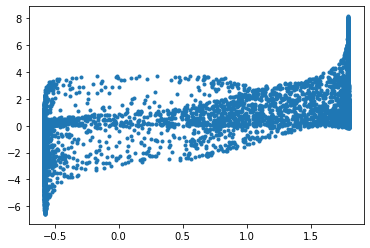

In [82]:
modelo = load_model('best_model11.h5')

v2_test11 = modelo.predict(XY2)

plt.plot(v2_test11,v2,'.')

print('MSE:', mean_squared_error(v2, v2_test11))
print('MAE:', mean_absolute_error(v2, v2_test11))
print('RMSE:', mean_squared_error(v2, v2_test11)**0.5)
print('Spearman R:', spearmanr(v2, v2_test11))
print('R2:', r2_score(v2, v2_test11))



10. Conclusiones Finales

In [83]:
# Tabla comparativa
from tabulate import tabulate
data = [[1,5,21,1000,1.47,0.85,1.21,0.78,0.61],
[1,10,41,1000,1.03,0.73,1.01,0.83,0.72],
[1,50,201,1000,0.73,0.62,0.86,0.88,0.80],
[1,100,401,650,1.32,0.82,1.15,0.80,0.65],
[1,1000,4001,20,3.18,1.26,1.78,0.50,0.15],
[2,5,51,1000,0.49,0.50,0.70,0.86,0.87],
[3,5,81,1000,0.09,0.20,0.30,0.95,0.98],
[5,5,141,283,2.51,1.16,1.58,0.59,0.33],
[10,5,291,215,2.56,1.16,1.60,0.57,0.31]
]
print (tabulate(data, headers=["Capas ocultas", "Neuronas por capa oculta", "Parámetros", "Épocas", "MSE", "MAE", "RMSE", "Spearman","R2"]))

  Capas ocultas    Neuronas por capa oculta    Parámetros    Épocas    MSE    MAE    RMSE    Spearman    R2
---------------  --------------------------  ------------  --------  -----  -----  ------  ----------  ----
              1                           5            21      1000   1.47   0.85    1.21        0.78  0.61
              1                          10            41      1000   1.03   0.73    1.01        0.83  0.72
              1                          50           201      1000   0.73   0.62    0.86        0.88  0.8
              1                         100           401       650   1.32   0.82    1.15        0.8   0.65
              1                        1000          4001        20   3.18   1.26    1.78        0.5   0.15
              2                           5            51      1000   0.49   0.5     0.7         0.86  0.87
              3                           5            81      1000   0.09   0.2     0.3         0.95  0.98
              5              

<font color='#086F0C'>Sobre el mismo conjunto de datos de prueba, la tabla resume los resultados, medidos en indicadores de error (MSE, MAE y RMSE) y otros de ajuste (Correlación de Spearman y $R^2$) al comparar la predicción efectuada por la red neuronal entrenada, con arquitectura variable, versus el valor real de la función. Notar que además se han incorporado la cantidad de parámetros involucrada en cada diseño y las épocas utilizadas en iterar, aunque todas las configuraciones se probaron con un mecanismo de parada temprana (paciencia = 10) y 1000 épocas disponibles en total.</font>

<font color='#086F0C'>Como se puede apreciar, para un número fijo de capas ocultas (1), el aumentar las neuronas en la capa mejora los índices de error y ajuste, sin embargo, no sucede de manera indefinida: al alcanzar 100 y 1000 neuronas se activa el criterio de parada temprana y los resultados tienden a empeorar. Es decir, aumentar el número de neuronas en la única capa oculta de manera indefinida, no necesariamente garantiza un mejor modelo, en particular si se busca una solución práctica.</font>

<font color='#086F0C'>Situación similar ocurre con el número de capas, en donde el mejor desempeño se observa al alcanzar 3 capas ocultas con 5 neuronas cada una, iterando en 1000 épocas de un total de 1000. Notar que con 5 y 10 capas los resultados vuelven a empeorar.</font>

<font color='#086F0C'>Por otro lado, en esta experiencia se obtuvo que al pasar de 1 capa oculta con 5 neuronas a 2 y 3 capas ocultas con 5 neuronas cada una, los resultados mejoraron de manera más rápida que cuando se insertan más neuronas en la misma capa, siempre utilizando las 1000 épocas disponibles en la estimación de los parámetros de la red.</font>

<font color='#086F0C'>Para finalizar, estos resultados refuerzan la idea de que no existe un mecanismo que garantice la configuración del "mejor modelo", así como también levantan una alerta de que, al construir una red con una arquitectura más compleja (más capas o más neuronas), lo que repercute en un mayor número de parámetros a estimar, no es sinónimo de lograr un mejor modelo siempre, si el objetivo es implementar una solución práctica.</font>

---

11. Referencias


*   Goodfellow, I., Bengio, Y. y Courville, A. (2016). *Deep Learning*. MIT Press. http://www.deeplearningbook.org

